In [1]:
import Model.GhostClassifier as model
import pandas as pd
import numpy as np
from tqdm import tqdm
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data=pd.read_parquet('/home/hashmi/Files/DataFolder/ParticleBoxData/DownstreamData.parquet')

In [3]:
sample=data.sample(frac=0.0001)
x=sample.drop('Downstream',axis=1)
y=sample['Downstream']

In [4]:
sample.head()

,track_chi2PerDoF,track_nLHCbIDs,track_p,track_phi,track_position_phi,track_position_r,track_position_x,track_position_y,track_pt,track_tx,track_ty,track_pseudoRapidity,Downstream
4748131,0.341014,12.0,6473.890178,0.044551,0.118512,671.349576,666.640503,79.376907,1337.326292,0.210917,0.009403,2.259409,True
5542135,0.364621,10.0,20316.601324,-2.204953,-1.846321,827.490549,-225.120651,-796.279663,2341.827656,-0.068754,-0.093479,2.850316,False
25714,1.919460,12.0,4816.519944,2.920155,2.563960,602.906380,-505.089355,329.212463,1095.428807,-0.227849,0.051296,2.160863,False
8629798,1.147321,10.0,2156.449626,3.057730,2.741159,1258.208494,-1158.674072,490.472229,1084.501374,-0.579800,0.048738,1.310249,False
2978758,0.958761,9.0,3521.684597,-2.942324,-1.687724,334.047580,-38.970604,-331.766602,794.710330,-0.227053,-0.045853,2.168883,False


In [5]:
#Probability= e^logit/1+e^logit
probabilityOut=[]
for x_row in tqdm(x.iterrows()):
    rawOut=model.apply_catboost_model(x_row[1])
    probabilityOut.append(np.exp(rawOut)/(1+np.exp(rawOut)))


998it [00:02, 429.86it/s]


In [6]:
sample['Probability']=probabilityOut
sample.head()

,track_chi2PerDoF,track_nLHCbIDs,track_p,track_phi,track_position_phi,track_position_r,track_position_x,track_position_y,track_pt,track_tx,track_ty,track_pseudoRapidity,Downstream,Probability
4748131,0.341014,12.0,6473.890178,0.044551,0.118512,671.349576,666.640503,79.376907,1337.326292,0.210917,0.009403,2.259409,True,0.664449
5542135,0.364621,10.0,20316.601324,-2.204953,-1.846321,827.490549,-225.120651,-796.279663,2341.827656,-0.068754,-0.093479,2.850316,False,0.040185
25714,1.919460,12.0,4816.519944,2.920155,2.563960,602.906380,-505.089355,329.212463,1095.428807,-0.227849,0.051296,2.160863,False,0.584002
8629798,1.147321,10.0,2156.449626,3.057730,2.741159,1258.208494,-1158.674072,490.472229,1084.501374,-0.579800,0.048738,1.310249,False,0.731277
2978758,0.958761,9.0,3521.684597,-2.942324,-1.687724,334.047580,-38.970604,-331.766602,794.710330,-0.227053,-0.045853,2.168883,False,0.024455


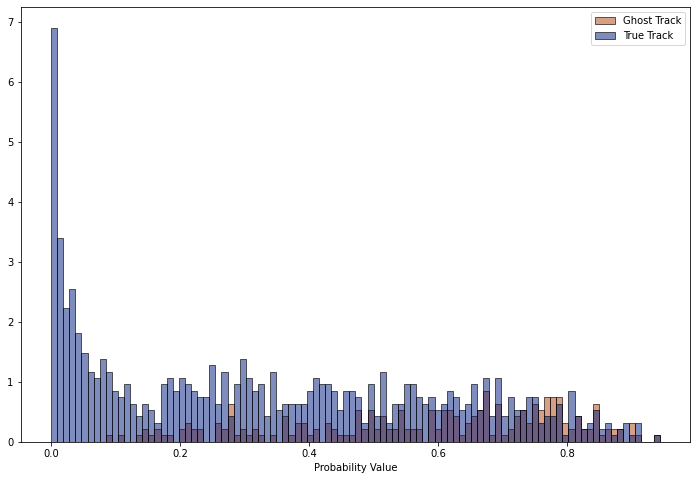

In [7]:
plt.figure(figsize=(12,8))
figure=sns.histplot(data=sample,x='Probability',hue='Downstream',stat='density',bins=100,palette='dark')
plt.xlabel('Probability Value')
plt.ylabel('')
plt.legend(labels=['Ghost Track','True Track'])
# plt.savefig('./Plots/ClassifierPlots/Train_Distribution.eps')
plt.show()